# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [73]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(study_results,mouse_metadata, how="left", on='Mouse ID')

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [75]:
# Checking the number of mice.
#number_of_mouse=combined_data['Mouse ID'].nunique()
#number_of_mouse

len(combined_data["Mouse ID"].unique())





249

In [77]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_id = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_id
#duplicate_mouse = combined_data[combined_data.duplicated(subset=['Mouse ID', 'Timepoint'],keep=False)],'Mouse ID']
#duplicate_mouse

array(['g989'], dtype=object)

In [79]:
# Optional: Get all the data for the duplicate mouse ID.
#Duplicate_mouse_ID = duplicate_mouse['Mouse ID'].nunique()
#Duplicate_mouse_ID

duplicate_mouse_data = combined_data.loc[combined_data ["Mouse ID"] == "g989"]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [81]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#cleaned_df = combined_data.drop_duplicates(subset=['Mouse ID'])
#DataFrame.drop_duplicates(subset=None, *, keep='first', inplace=False, ignore_index=False)

#clean_df = combined_data[~combined_data['Mouse ID'].isin(Duplicate_mouse_ID)]
#cleaned_df = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)
#cleaned_df.DataFrame(cleaned_df, index=None, columns=None, dtype=None, copy=None)

#cleaned_df = combined_data.drop_duplicates(subset=['Mouse ID','Timepoint'],keep=False)
#cleaned_df

#combined_data.Duplicate_mouse_ID(['Mouse ID']).sum()
#combined_data


 
cleaned_df = combined_data[combined_data['Mouse ID'].isin(duplicate_mouse_id)==False]
cleaned_df.head()




,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [83]:
# Checking the number of mice in the clean DataFrame.
#num_in_Cleaned_df = cleaned_df['Mouse ID'].nunique()
#num_in_Cleaned_df
len(cleaned_df['Mouse ID'].unique())

248

## Summary Statistics

In [86]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
#summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
grouped_data = cleaned_df.groupby('Drug Regimen')
mean_tumor_volume = grouped_data['Tumor Volume (mm3)'].mean()
median_tumor_volume = grouped_data['Tumor Volume (mm3)'].median()
Tumor_Volume_Variance = grouped_data['Tumor Volume (mm3)'].var()
Tumor_Volume_Std_Dev = grouped_data['Tumor Volume (mm3)'].std()
Tumor_Volume_Std_Err= grouped_data['Tumor Volume (mm3)'].sem()

summary_stats =pd.DataFrame({"Mean tumor volume": mean_tumor_volume,
                                 "Median tumor volume" :median_tumor_volume,
                                 "Variance tumor volume" : Tumor_Volume_Variance,
                                 "Vumor Volume Std. Dev" : Tumor_Volume_Std_Dev,
                                 "Tumor Volume Std. Err" : Tumor_Volume_Std_Err,
                                 })
summary_stats                        

,Mean tumor volume,Median tumor volume,Variance tumor volume,Vumor Volume Std. Dev,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [88]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Std Deviation', 'SEM']
display(summary_stats)

,Mean,Median,Variance,Std Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

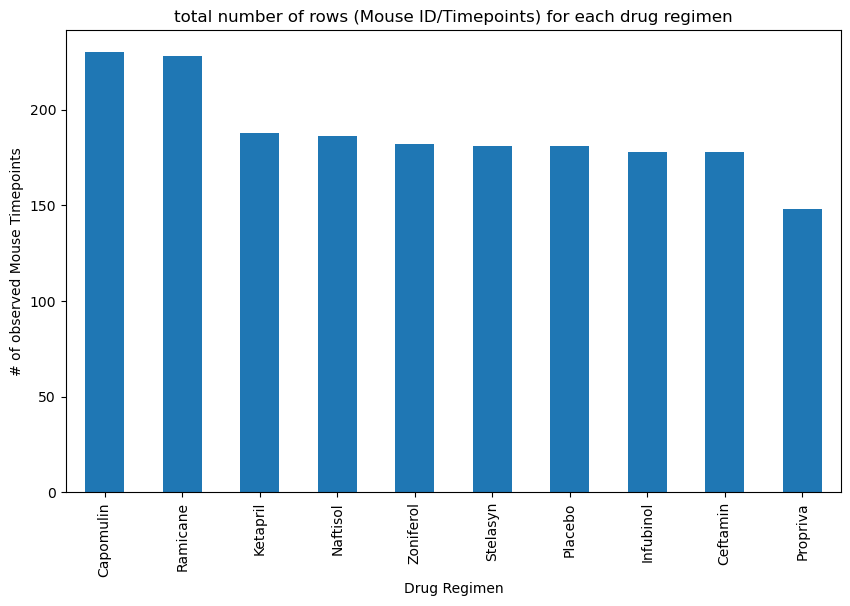

In [91]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
#drug_regimen_counts = cleaned_df['Drug Regimen'].value_count()
drug_regimen_counts.plot(kind='bar', figsize=(10, 6))
plt.title('total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of observed Mouse Timepoints')
plt.show()

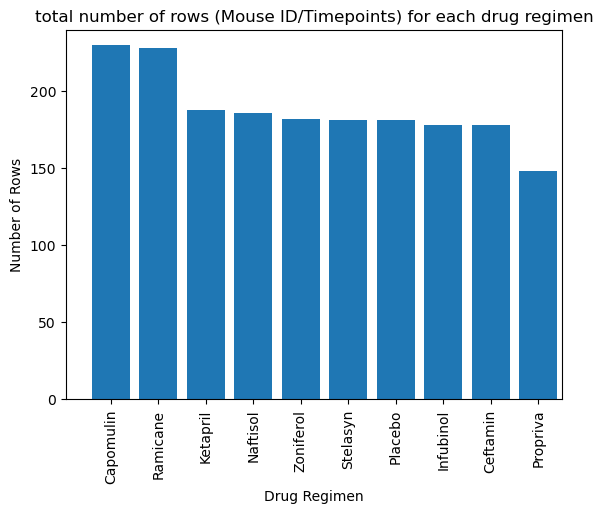

In [139]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_regimen_counts = cleaned_df['Drug Regimen'].value_counts()
plt.bar(drug_regimen_counts.index, drug_regimen_counts.values, alpha=1, align='center')
plt.xlim(-0.95, len(drug_regimen_counts.index)-0.50)
plt.ylim(0, max(drug_regimen_counts.values)+10)
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation="vertical")
plt.title('total number of rows (Mouse ID/Timepoints) for each drug regimen')
plt.show()



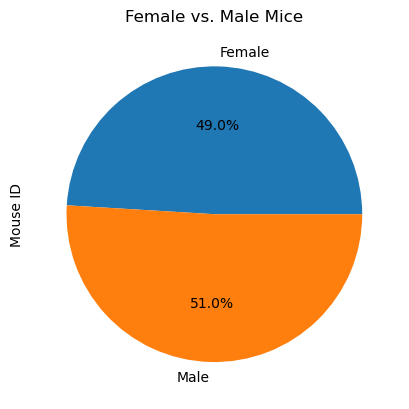

In [163]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
gender_counts = cleaned_df.groupby(["Sex"]).count()["Mouse ID"]
gender_counts


# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender

gender_counts.plot.pie(autopct= "%1.1f%%")
plt.title("Female vs. Male Mice")
plt.show()

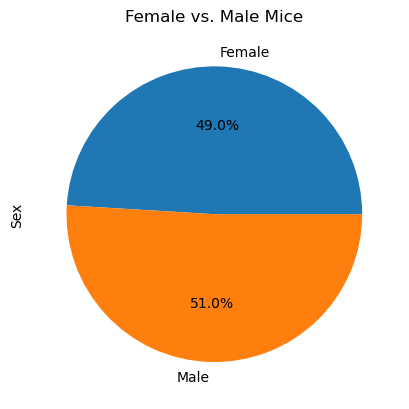

In [141]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender


# Make the pie chart


labels = ['Female', 'Male']
sizes = [49.8989395, 50.700902]
plot = gender_counts.plot.pie(y='Total Count', autopct="%1.1f%%")
plt.ylabel('Count')
plt.title("Female vs. Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [100]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_timepoint = combined_data[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]
mouse_timepoint = mouse_timepoint.sort_values(["Timepoint"], ascending=True)
mouse_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
Merged_group = mouse_timepoint.merge(combined_data, on = ('Mouse ID', 'Timepoint'), how = 'left' )
Merged_group

#tumor volume at timnepoint
tumor_tp = mouse_timepoint[["Drug Regimen", "Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
tumor_tp

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Capomulin,b128,0,45.000000
221,Ceftamin,q483,0,45.000000
220,Ceftamin,o287,0,45.000000
219,Ceftamin,b487,0,45.000000
218,Ceftamin,p438,0,45.000000
...,...,...,...,...
1802,Infubinol,e476,45,62.435404
1804,Infubinol,a203,45,67.973419
1806,Infubinol,f345,45,60.918767
1810,Ceftamin,l471,45,67.748662


In [102]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

for drug in treatments:
    subset = combined_data[combined_data['Drug Regimen'] == drug]['Tumor Volume (mm3)'] 
    tumor_vol_data.append(subset)

# Calculate the IQR and quantitatively determine if there are any potential outliers.
#quartiles = subset.quantile([0.25, 0.5, 0.75]) IQR = quartiles[0.75] - quartiles[0.25] lower_bound = quartiles[0.25] - (1.5 * IQR) upper_bound = quartiles[0.75] + (1.5 * IQR) outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

    # Locate the rows which contain mice on each drug and get the tumor volumes

#subset = df[df['Drug'] == 'YourDrugNameHere']['Tumor Volume']
    # add subset
#tumor_vol_data.append(subset)

    # Determine outliers using upper and lower bounds
quartiles = subset.quantile([0.25, 0.5, 0.75]) 
IQR = quartiles[0.75] - quartiles[0.25] 
lower_bound = quartiles[0.25] - (1.5 * IQR) 
upper_bound = quartiles[0.75] + (1.5 * IQR) 
outliers = subset[(subset < lower_bound) | (subset > upper_bound)]

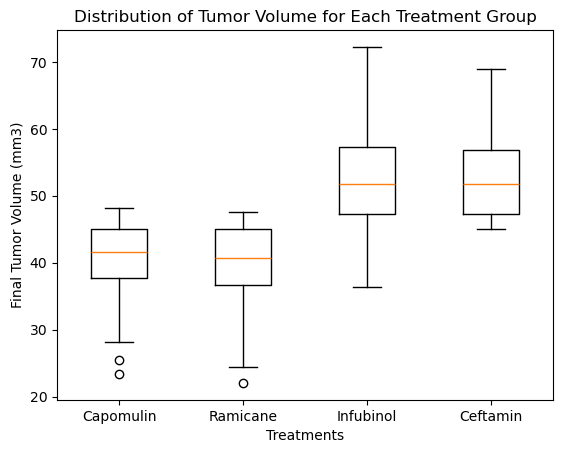

In [104]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
plt.boxplot(tumor_vol_data, labels=treatments)
plt.title('Distribution of Tumor Volume for Each Treatment Group') 
plt.xlabel('Treatments') 
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

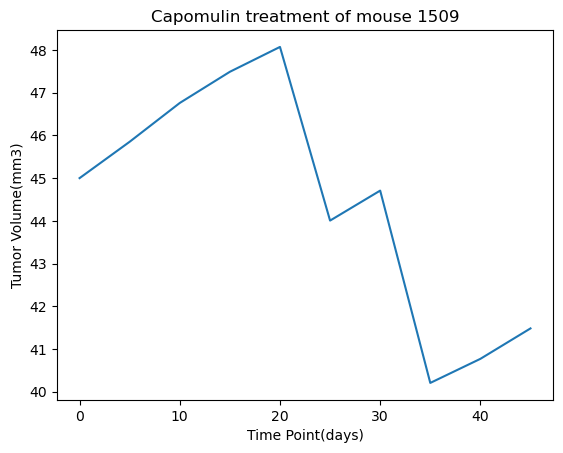

In [111]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_data = cleaned_df [(cleaned_df ['Mouse ID'] == 'l509') & (cleaned_df ['Drug Regimen'] == 'Capomulin')][['Timepoint', 'Tumor Volume (mm3)']]

plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'])
plt.title('Capomulin treatment of mouse 1509')
plt.xlabel('Time Point(days)')
plt.ylabel('Tumor Volume(mm3)')
plt.show()

Text(0.5, 1.0, 'Weight Versus Average Tumor Volume for Capomulin')

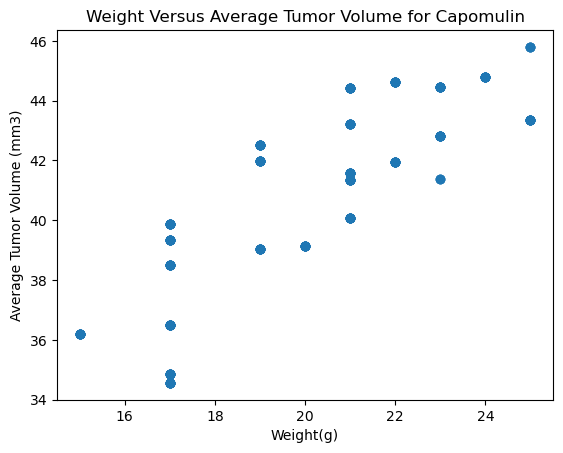

In [109]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_regimen = combined_data[combined_data['Drug Regimen'] =='Capomulin']
average_tumor_volume = capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()


combined_data = pd.merge(average_tumor_volume, capomulin_regimen[['Mouse ID', 'Weight (g)']], on='Mouse ID')

plt.scatter(combined_data['Weight (g)'],combined_data['Tumor Volume (mm3)'])
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Weight Versus Average Tumor Volume for Capomulin')

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


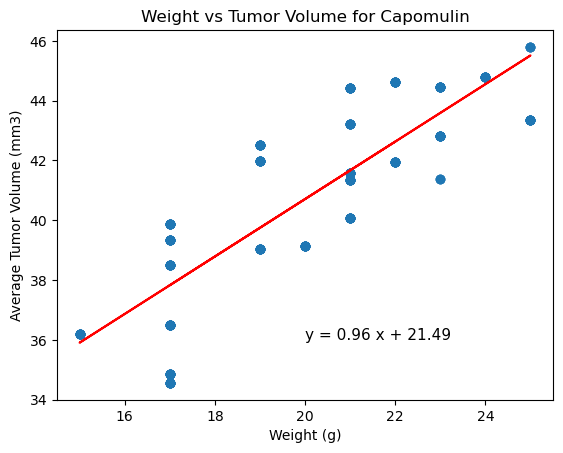

In [131]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coefficient =  st.pearsonr(combined_data['Weight (g)'],combined_data['Tumor Volume (mm3)'])

print(f"The correlation between mouse weight and the average tumor volume is {round(correlation_coefficient[0],2)}")



(slope, intercept,rvalue, pvalue, stderr)=st.linregress(combined_data["Weight (g)"],combined_data["Tumor Volume (mm3)"])
regress_values=combined_data["Weight (g)"]* slope + intercept
line_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"



plt.scatter(combined_data["Weight (g)"],combined_data["Tumor Volume (mm3)"])
plt.plot(combined_data["Weight (g)"], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=11)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
plt.show()
